In [1]:
from Bio import AlignIO
import matplotlib.pyplot as plt

from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

import rich
from rich_msa import RichAlignment

import logomaker
import pandas as pd

import pandas as pd

import gzip, logomaker, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, protfasta

Matplotlib is building the font cache; this may take a moment.


In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# Colors used in the visualizations
amino_acid_colors_white = {
    # Purples
    'F': '#FFA442',  
    'W': '#006CAF',
    'L': '#5B2B82',

    # Reds
    'D': '#E03839', 
    'E': '#FDA0A5', 

    # Blues
    'K': '#00B3E5',
    'R': '#00B3E5',

    # black
    'S': '#000000',
    'P': '#000000',

    # greys
    'A': '#787878', 
    'V': '#787878',  
    'I': '#787878',  
    'M': '#787878',  
    'T': '#787878',  
    'G': '#787878',  
    'C': '#787878',  
    'N': '#787878',  
    'Q': '#787878',  
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#FFFFFF"
}

In [4]:
# Create a function that takes in a fasta file containing a multiple sequence alignment (MSA),
# a coloring scheme for each amino acid, the start and stop positions in the amino acid MSA (for the
# range that the LogoMaker covers), the x-axis tick spacing, and the width and height values for logo
def DrawLogo(alignment_file, AA_color_scheme, start_position, end_position, x_axis_tick_space, figure_width = 16, figure_height = 4):

    # Read in fasta file
    fasta_file = protfasta.read_fasta(alignment_file, duplicate_sequence_action='ignore', duplicate_record_action='ignore', invalid_sequence_action = 'ignore', alignment = True, expect_unique_header = False)

    # Convert the alignment into a dataframe
    fasta_file = pd.DataFrame(fasta_file.items(), columns = ['Name', 'Sequence'])

    # Extract the protein sequences only and split each character in the alignment into multiple different columns
    ManyColumnsDF = fasta_file['Sequence'].str.split('', expand=True)

    # Create an empty dataframe
    PercentIdentityDF = pd.DataFrame()

    # Create a for loop that updates the amino acid percent identities in each position of the sequence alignment
    for column in ManyColumnsDF.loc[:, start_position:end_position + 1].columns:
        AAs = ManyColumnsDF[column].value_counts()
        #Create a dictionary with all of the amino acid percent identities initialized to 0
        AA_dict = {'A':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'I':0, 'K':0, 'L':0, 'M':0, 'N':0, 'P':0, 'Q':0, 'R':0, 'S':0, 'T':0, 'V':0, 'W':0, 'Y':0}
        # Iterate though each amino acid present in the column and match it with its key in the dict
        for AA in AAs.index.tolist():   # 'AAs.index.tolist()' finds unique amino acids that are present
            for key in AA_dict:         # in a position in the alignment. It then adds them once to a list
                if key == AA:
                    #After matching an amino acid to its key, the value count of the amino acid is used
                    # to calculate the percent identity of an amino acid in a specific position in the alignment
                    AA_dict[key] = AA_dict[key] + round(AAs[AA]/sum(AAs.values.tolist()) * 100)
                    PID_DF2 = pd.DataFrame(list(AA_dict.items()), columns = ['AA Code', column]).set_index('AA Code')
                    PercentIdentityDF[column] = PID_DF2[column]
                else:
                    continue

    # Take a specific section from the protein MSA
    TransposedDF = PercentIdentityDF.transpose()
    
    # Create a logomaker Logo object
    logo = logomaker.Logo(TransposedDF, color_scheme = AA_color_scheme, figsize=(figure_width, figure_height))

    # Remove black lines bordering LogoMaker plot
    logo.style_spines(visible = False)
    
    # Adjust the tick marks and the labels for the x and y axes
    logo.ax.set_xticks(range(start_position, end_position + 1, x_axis_tick_space))
    logo.ax.set_yticks(range(0, 110, 10))
    logo.ax.set_xlabel('MSA Position')
    logo.ax.set_ylabel('Percent Identity')
    
    # Add black lines (spines) on the x and y axes
    logo.style_spines(spines=['bottom', 'left'], visible = True)

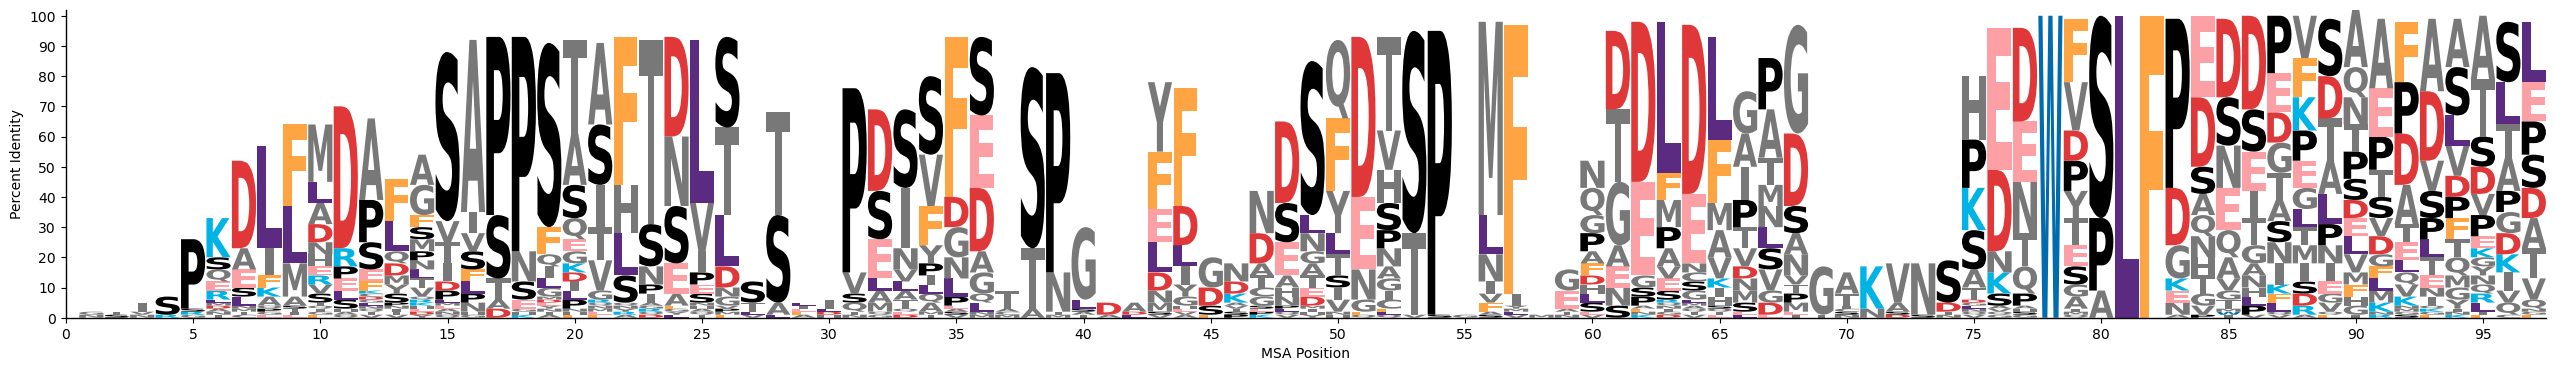

In [8]:
# Logo using most active sequences
DrawLogo(
    alignment_file = "Activity_at_WxxLF_-50_+20_top70_muscle.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 0,  # Be careful with start/end positions;
    end_position = 99,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 32,
    figure_height = 4
)

plt.savefig("Activity_at_WxxLF_-50_+20_top70_muscle_seq_logo_full.pdf")

/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_11039/1269180771.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PercentIdentityDF[column] = PID_DF2[column]
/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_11039/1269180771.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PercentIdentityDF[column] = PID_DF2[column]
/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_11039/1269180771.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

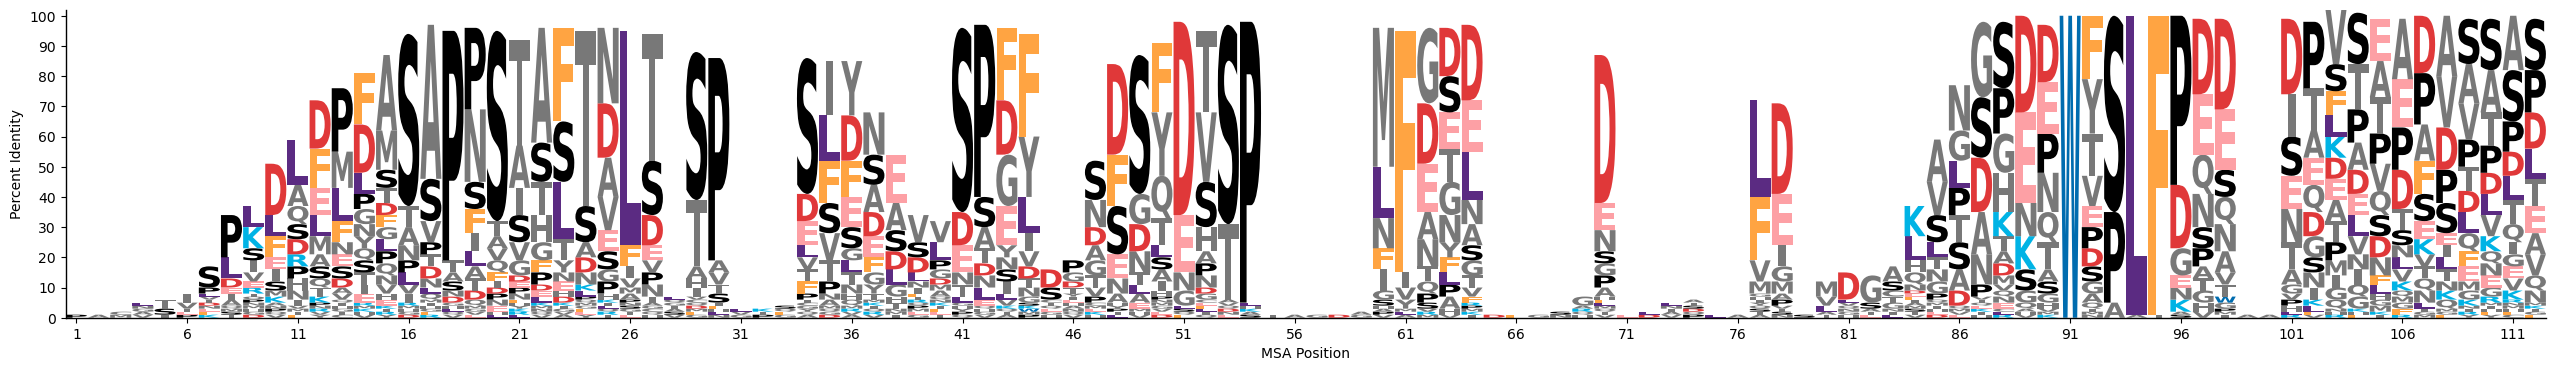

In [6]:
# Logo using 138 unique sequences around the motif
DrawLogo(
    alignment_file = "AllSeqs_Activity_at_WxxLF_-50_+20_all138_muscleCopy.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 1,  # Be careful with start/end positions;
    end_position = 115,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 32,
    figure_height = 4
)

plt.savefig("AllSeqs_Activity_at_WxxLF_-50_+20_all138_muscleCopy_full.pdf")

/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_11039/1269180771.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PercentIdentityDF[column] = PID_DF2[column]
/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_11039/1269180771.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PercentIdentityDF[column] = PID_DF2[column]
/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_11039/1269180771.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

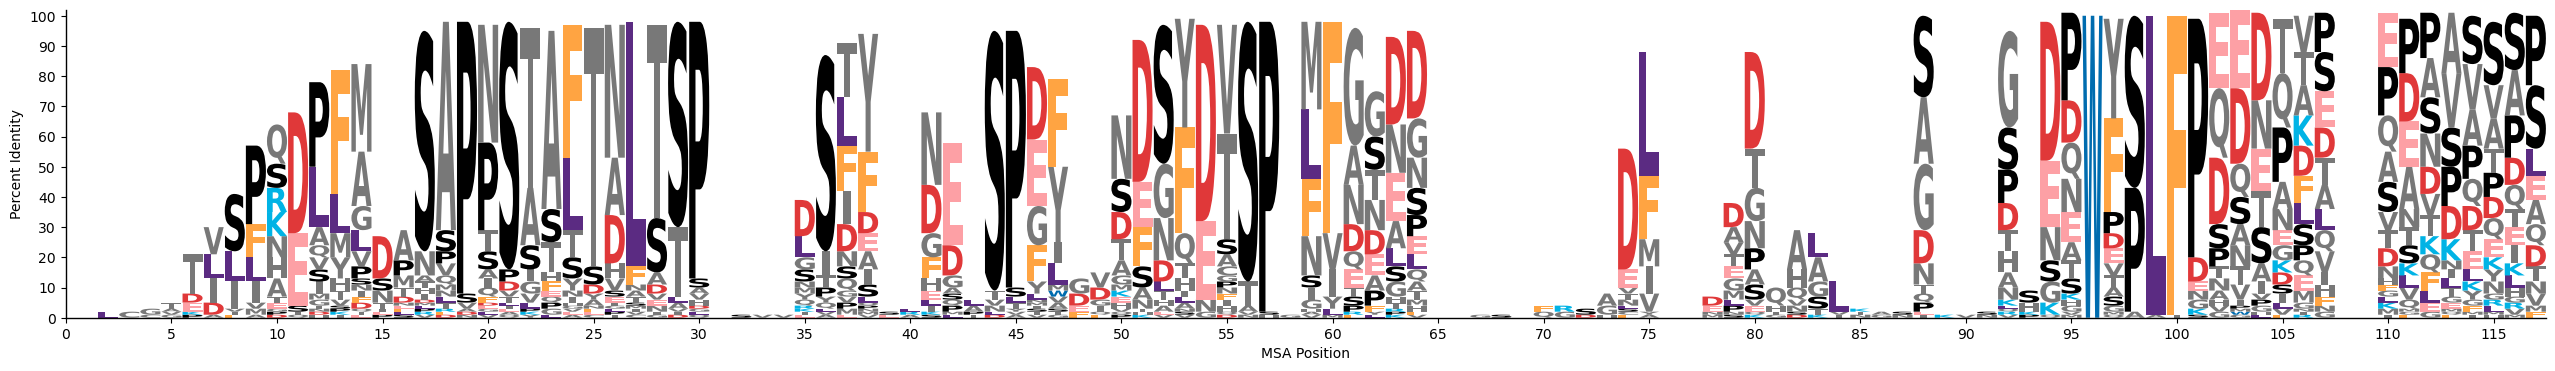

In [7]:
# Logo using all 500 sequences in the MSA
DrawLogo(
    alignment_file = "500seqs_muscle-I20240708-234220-0895-13252508-p1m.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 0,  # Be careful with start/end positions;
    end_position = 119,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 32,
    figure_height = 4
)

plt.savefig("500seqs_muscle-I20240708-234220-0895-13252508-p1m_full.pdf")